In [38]:
import json
try:
    import seaborn as sns
except ImportError as e:
    %pip install seaborn
try:
    import matplotlib.pyplot as plt
except ImportError as e:
    %pip install matplotlib
%matplotlib inline

## Custom Schedules With ARLBench

These examples will show you how to create and run schedules using ARLBench. First, let's look at how this looks.
To make any sort of schedule, you want to first create an instance of the AutoRLEnv:

```python
# Initialize environment with general config
env = AutoRLEnv(cfg.autorl)

# Reset environment
_ = env.reset()
```

This looks like an RL env, so you should already be familiar with what comes next:

```python
# Run for 10 steps
for _ in range(10):
    # The objectives are configured to return the mean reward
    _, objectives, _, _, _ = env.step(cfg.hp_config)
```

Here we do 10 steps, the length of which is configured via the config.
Since the 'hp_config' is given at each step, we can adapt the hyperparameters for the next one.

Now we can check out a really simple schedule heuristic we prepared beforehand, epsilon decay tied to the reward for DQN on CartPole:

In [43]:
!python run_heuristic_schedule.py

[2025-02-20 00:14:39,413][root][INFO] - Starting run with epsilon value 0.9
[2025-02-20 00:14:39,423][jax._src.xla_bridge][INFO] - Unable to initialize backend 'cuda': 
[2025-02-20 00:14:39,423][jax._src.xla_bridge][INFO] - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
[2025-02-20 00:14:39,423][jax._src.xla_bridge][INFO] - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/dierkes/miniconda3/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)
[2025-02-20 00:14:42,606][root][INFO] - Agent reached performance threshold, decreasing epsilon to 0.7
[2025-02-20 00:15:00,568][root][INFO] - Training finished with a tot

<Axes: >

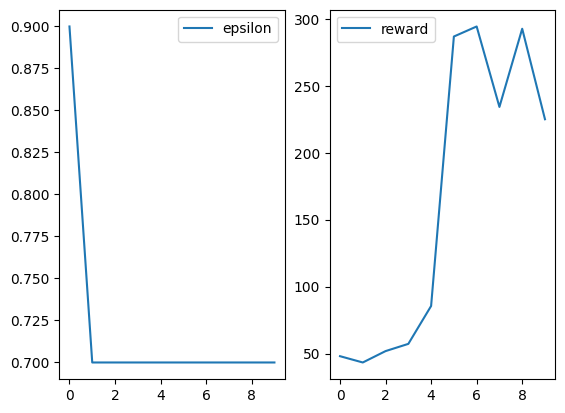

In [44]:
result_dir = "results/heuristic_schedule_dqn_CartPole-v1/42"
with open(result_dir + "/output.json") as f:
    results = json.load(f)
rewards = results["rewards"]
epsilons = results["epsilons"]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
sns.lineplot({"epsilon": epsilons}, ax=ax1)
sns.lineplot({"reward": rewards}, ax=ax2)

Since we're not only returning objectives, but also some optional information about the RL state, we also tried to adjust the learning rate according to the grad norm:

In [ ]:
!python run_reactive_schedule.py

<Axes: >

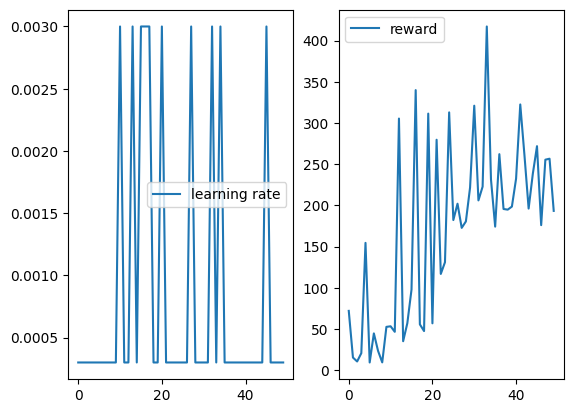

In [49]:
result_dir = "results/reactive_schedule_dqn_CartPole-v1/42"
with open(result_dir + "/output.json") as f:
    results = json.load(f)
rewards = results["rewards"]
lrs = results["lr"]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
sns.lineplot({"learning rate": lrs}, ax=ax1)
sns.lineplot({"reward": rewards}, ax=ax2)

As you can see, these are maybe not the best schedule ideas ever, but they show you what you can do with schedules in ARLBench!